<a href="https://colab.research.google.com/github/Timoyaj/DatatalkClub_ML_tasks/blob/main/Assigment_2_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression Analysis of Laptop data

In [2]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv

--2024-10-05 20:55:55--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 298573 (292K) [text/plain]
Saving to: ‘laptops.csv’

laptops.csv         100%[===================>] 291.58K  --.-KB/s    in 0.03s   

2024-10-05 20:55:56 (10.9 MB/s) - ‘laptops.csv’ saved [298573/298573]



In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [6]:
df =pd.read_csv('laptops.csv')
df.head()


,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [7]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [9]:
df=df[['ram',
'storage',
'screen',
'final_price']]

In [10]:
#Look at the final_price variable. Does it have a long tail?

In [11]:
df.final_price.describe()

,final_price
count,2160.000000
mean,1312.638509
std,911.475417
min,201.050000
25%,661.082500
50%,1031.945000
75%,1708.970000
max,7150.470000


<Axes: ylabel='Frequency'>

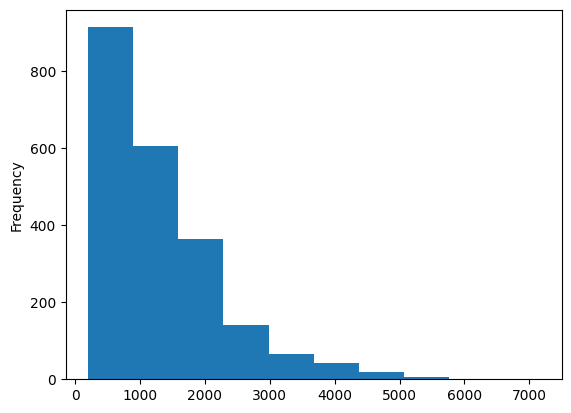

In [13]:
df.final_price.plot.hist()

Yes the final price has a long tail

# Find missing values in the data

In [14]:
df.isna().sum()

,0
ram,0
storage,0
screen,4
final_price,0


the columns with missing values is Screen

# what is the medea for ram

In [15]:
df.ram.describe()

,ram
count,2160.000000
mean,15.413889
std,9.867815
min,4.000000
25%,8.000000
50%,16.000000
75%,16.000000
max,128.000000


In [16]:
print(f'The median for ram is {df.ram.median()}')

the median for ram is 16.0


Prepare and split the dataset
Shuffle the dataset (the filtered one you created above), use seed 42.
Split your data in train/val/test sets, with 60%/20%/20% distribution.

In [17]:

from sklearn.model_selection import train_test_split

In [18]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

We need to deal with missing values for the column from Q1.
We have two options: fill it with 0 or with the mean of this variable.
Try both options. For each, train a linear regression model without regularization using the code from the lessons.
For computing the mean, use the training only!
Use the validation dataset to evaluate the models and compare the RMSE of each option.
Round the RMSE scores to 2 decimal digits using round(score, 2)
Which option gives better RMSE?

In [19]:
# prompt: We need to deal with missing values for the column from Q1.
# We have two options: fill it with 0 or with the mean of this variable.
# Try both options. For each, train a linear regression model without regularization using the code from the lessons.
# For computing the mean, use the training only!
# Use the validation dataset to evaluate the models and compare the RMSE of each option.
# Round the RMSE scor

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# We need to deal with missing values for the column 'screen'
# We have two options: fill it with 0 or with the mean of this variable.

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.final_price.values
y_val = df_val.final_price.values
y_test = df_test.final_price.values

del df_train['final_price']
del df_val['final_price']
del df_test['final_price']

# Option 1: Fill with 0
df_train_0 = df_train.fillna(0)
df_val_0 = df_val.fillna(0)

# Option 2: Fill with mean
mean_screen = df_train.screen.mean()
df_train_mean = df_train.fillna(mean_screen)
df_val_mean = df_val.fillna(mean_screen)


# Train linear regression model for option 1 (fill with 0)
model_0 = LinearRegression()
model_0.fit(df_train_0, y_train)
y_pred_0 = model_0.predict(df_val_0)
rmse_0 = np.sqrt(mean_squared_error(y_val, y_pred_0))
print(f'RMSE for filling with 0: {round(rmse_0, 2)}')


# Train linear regression model for option 2 (fill with mean)
model_mean = LinearRegression()
model_mean.fit(df_train_mean, y_train)
y_pred_mean = model_mean.predict(df_val_mean)
rmse_mean = np.sqrt(mean_squared_error(y_val, y_pred_mean))
print(f'RMSE for filling with mean: {round(rmse_mean, 2)}')


RMSE for filling with 0: 581.35
RMSE for filling with mean: 579.98


Now let's train a regularized linear regression.
For this question, fill the NAs with 0.
Try different values of r from this list: [0, 0.01, 0.1, 1, 5, 10, 100].
Use RMSE to evaluate the model on the validation dataset.
Round the RMSE scores to 2 decimal digits.
Which r gives the best RMSE?

In [20]:
# prompt: Now let's train a regularized linear regression.
# For this question, fill the NAs with 0.
# Try different values of r from this list: [0, 0.01, 0.1, 1, 5, 10, 100].
# Use RMSE to evaluate the model on the validation dataset.
# Round the RMSE scores to 2 decimal digits.
# Which r gives the best RMSE?

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# We will use the df_train_0 and df_val_0 which we created previously.

for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
  model = Ridge(alpha=r)
  model.fit(df_train_0, y_train)
  y_pred = model.predict(df_val_0)
  rmse = np.sqrt(mean_squared_error(y_val, y_pred))
  print(f'For r={r}, RMSE: {round(rmse, 2)}')


For r=0, RMSE: 581.35
For r=0.01, RMSE: 581.35
For r=0.1, RMSE: 581.35
For r=1, RMSE: 581.35
For r=5, RMSE: 581.35
For r=10, RMSE: 581.34
For r=100, RMSE: 581.24


We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
For each seed, do the train/validation/test split with 60%/20%/20% distribution.
Fill the missing values with 0 and train a model without regularization.
For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
Round the result to 3 decimal digits (round(std, 3))

In [21]:
# prompt: We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
# Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
# For each seed, do the train/validation/test split with 60%/20%/20% distribution.
# Fill the missing values with 0 and train a model without regularization.
# For each seed, evaluate the model on the validation dataset and collect the RMSE scores

import numpy as np
rmse_scores = []
for seed in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
  df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=seed)
  df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=seed)

  df_train = df_train.reset_index(drop=True)
  df_val = df_val.reset_index(drop=True)
  df_test = df_test.reset_index(drop=True)

  y_train = df_train.final_price.values
  y_val = df_val.final_price.values
  y_test = df_test.final_price.values

  del df_train['final_price']
  del df_val['final_price']
  del df_test['final_price']

  df_train_0 = df_train.fillna(0)
  df_val_0 = df_val.fillna(0)

  model_0 = LinearRegression()
  model_0.fit(df_train_0, y_train)
  y_pred_0 = model_0.predict(df_val_0)
  rmse_0 = np.sqrt(mean_squared_error(y_val, y_pred_0))
  rmse_scores.append(rmse_0)

std_rmse = np.std(rmse_scores)
print(f"Standard deviation of RMSE scores: {round(std_rmse, 3)}")


Standard deviation of RMSE scores: 36.29


Split the dataset like previously, use seed 9.
Combine train and validation datasets.
Fill the missing values with 0 and train a model with r=0.001.
What's the RMSE on the test dataset?

In [22]:
# prompt: Split the dataset like previously, use seed 9.
# Combine train and validation datasets.
# Fill the missing values with 0 and train a model with r=0.001.
# What's the RMSE on the test dataset?

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge

# Split the dataset like previously, use seed 9.
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=9)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=9)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.final_price.values
y_val = df_val.final_price.values
y_test = df_test.final_price.values

del df_train['final_price']
del df_val['final_price']
del df_test['final_price']

# Combine train and validation datasets.
df_full_train = pd.concat([df_train, df_val])
y_full_train = np.concatenate([y_train, y_val])

# Fill the missing values with 0 and train a model with r=0.001.
df_full_train_0 = df_full_train.fillna(0)
df_test_0 = df_test.fillna(0)

model = Ridge(alpha=0.001)
model.fit(df_full_train_0, y_full_train)
y_pred = model.predict(df_test_0)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE on the test dataset: {round(rmse, 2)}")


RMSE on the test dataset: 535.08
